In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

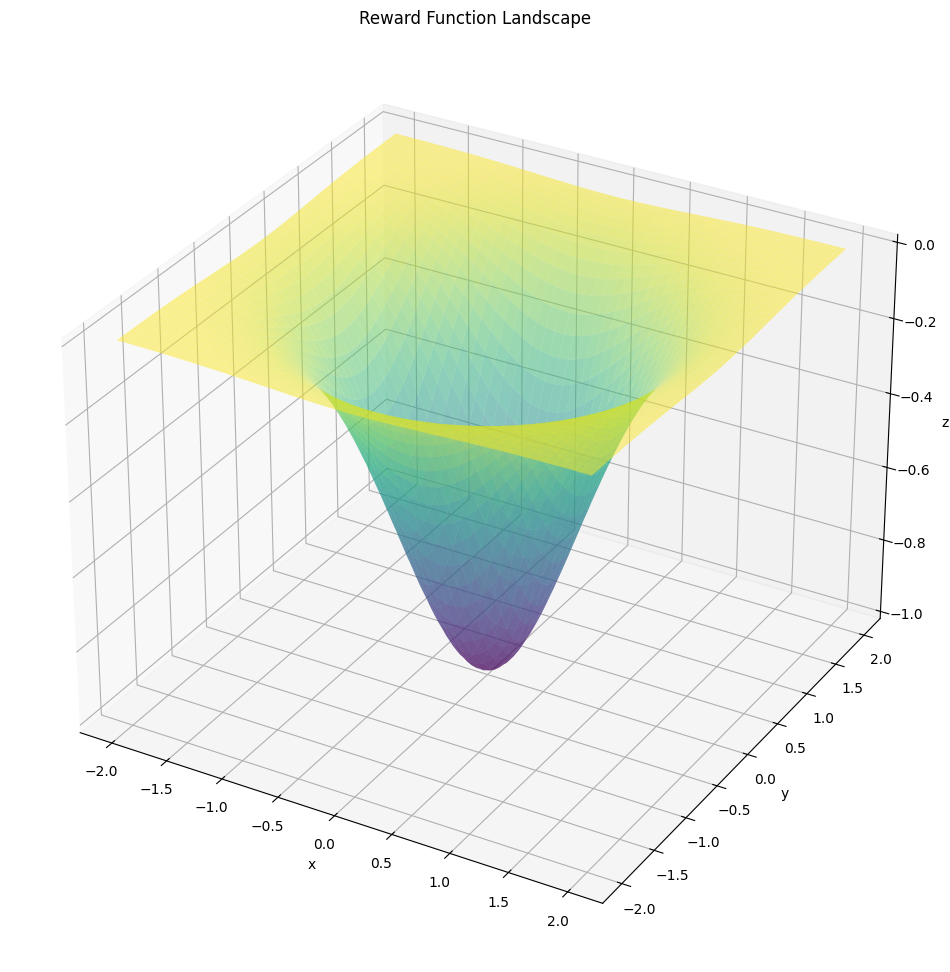

In [2]:
# Create grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Reward function
Z = -np.exp(-(X**2 + Y**2))

# Plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Reward Function Landscape')
plt.show()

In [3]:
# iterations
num_iter=160

# Learning rate
lr = 0.2

# Initialize parameters randomly
x, y = -1.8, 1.8

# Store trajectory
trajectory = []

for step in range(num_iter):
  reward = -np.exp(-(x**2 + y**2))
  trajectory.append((x, y, reward))

  # Gradients
  dx = 2 * x * reward
  dy = 2 * y * reward

  # Update (gradient ascent)
  x = x + lr * dx
  y = y + lr * dy

trajectory = np.array(trajectory)

In [4]:
for i, r in enumerate(trajectory, start=1):
    print(i, "(",r[0], ",", r[1],")")

1 ( -1.8 , 1.8 )
2 ( -1.7988956563108864 , 1.7988956563108864 )
3 ( -1.7977831823432946 , 1.7977831823432946 )
4 ( -1.7966624636766066 , 1.7966624636766066 )
5 ( -1.7955333835123954 , 1.7955333835123954 )
6 ( -1.7943958226089705 , 1.7943958226089705 )
7 ( -1.7932496592136755 , 1.7932496592136755 )
8 ( -1.792094768992848 , 1.792094768992848 )
9 ( -1.7909310249593406 , 1.7909310249593406 )
10 ( -1.789758297397507 , 1.789758297397507 )
11 ( -1.7885764537855398 , 1.7885764537855398 )
12 ( -1.7873853587150537 , 1.7873853587150537 )
13 ( -1.7861848738077941 , 1.7861848738077941 )
14 ( -1.7849748576293478 , 1.7849748576293478 )
15 ( -1.7837551655997272 , 1.7837551655997272 )
16 ( -1.7825256499006916 , 1.7825256499006916 )
17 ( -1.7812861593796623 , 1.7812861593796623 )
18 ( -1.7800365394500817 , 1.7800365394500817 )
19 ( -1.7787766319880587 , 1.7787766319880587 )
20 ( -1.7775062752251343 , 1.7775062752251343 )
21 ( -1.7762253036369908 , 1.7762253036369908 )
22 ( -1.7749335478279238 , 1.774933

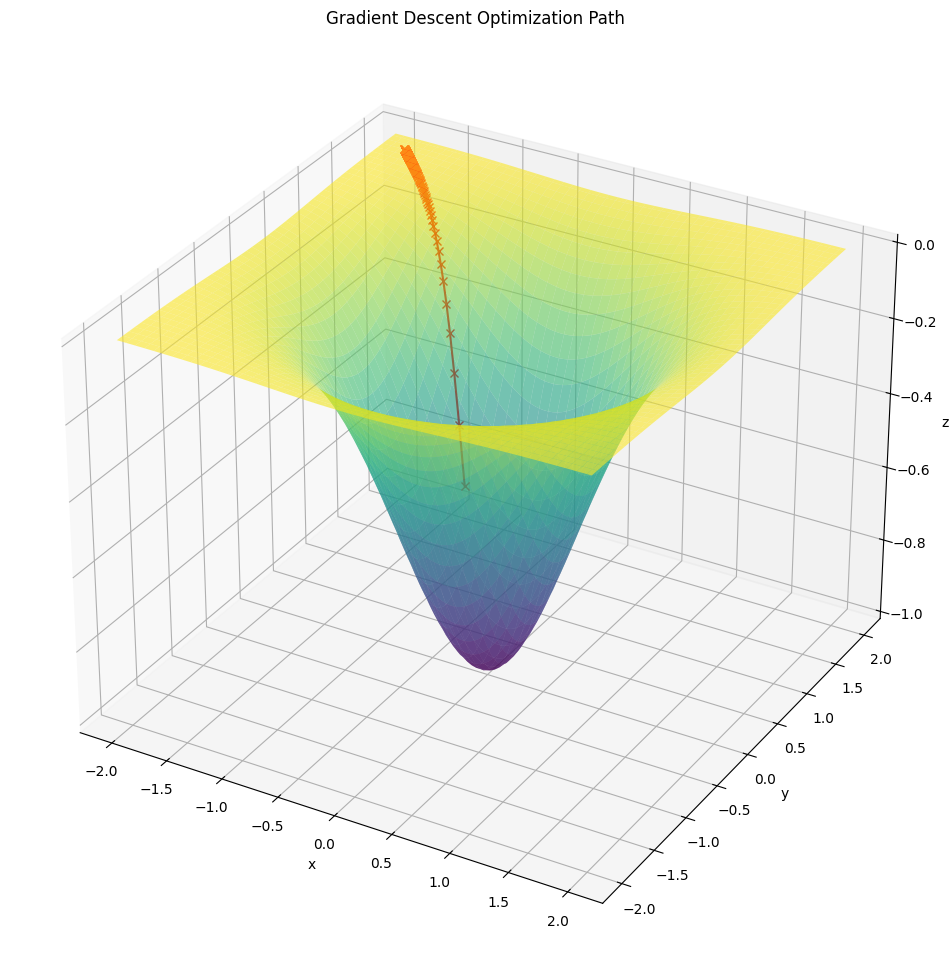

In [5]:
fig = plt.figure(figsize=(12, 20))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='red', marker='x')

ax.set_title('Gradient Descent Optimization Path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Regresión Lineal con Gradiente Descendente

$$
y = m x + b
$$

$$
J(m,b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - m x_i - b)^2
$$

$$
\frac{\partial J}{\partial m} = -\frac{1}{n} \sum_{i=1}^{n} x_i \, (y_i - m x_i - b)
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - m x_i - b)
$$

$$
m := m - \alpha \frac{\partial J}{\partial m}
\quad,\quad
b := b - \alpha \frac{\partial J}{\partial b}
$$


In [30]:
class GradientDescentLinearRegression:
    """
    Implementacion de Gradiente Descendiente
    """
    def __init__(self, learning_rate=0.01, iterations=1000, initial_m=5, initial_b=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.initial_m = initial_m
        self.initial_b = initial_b
    
    def fit(self, X, y):
        """
        Actualizacion de los pesos con gradiente descendente
        """
        b = 0
        m = 5
        n = X.shape[0]
        for i in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)

            # Print current values and function value for monitoring
            if i % 50 == 0:
                error = mean_squared_error(m*X + b, y)
                print(f"Iteration {i}: b={b:.4f}, m={m:.4f}, MSE={error:.4f}")
        
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [31]:
X = np.array(sorted(list(range(5))*200)) + np.random.normal(size=1000, scale=0.5)
y = np.array(sorted(list(range(5))*200)) + np.random.normal(size=1000, scale=0.25)

Iteration 1: b=0.0261, m=4.9485
Iteration 51: b=0.5783, m=3.0059
Iteration 101: b=0.7954, m=1.9291
Iteration 151: b=0.8364, m=1.3448
Iteration 201: b=0.7905, m=1.0386
Iteration 251: b=0.7064, m=0.8876
Iteration 301: b=0.6104, m=0.8218
Iteration 351: b=0.5156, m=0.8015
Iteration 401: b=0.4285, m=0.8045
Iteration 451: b=0.3514, m=0.8183
Iteration 501: b=0.2848, m=0.8363
Iteration 551: b=0.2281, m=0.8549
Iteration 601: b=0.1803, m=0.8725
Iteration 651: b=0.1402, m=0.8883
Iteration 701: b=0.1069, m=0.9021
Iteration 751: b=0.0791, m=0.9139
Iteration 801: b=0.0561, m=0.9239
Iteration 851: b=0.0370, m=0.9322
Iteration 901: b=0.0213, m=0.9392
Iteration 951: b=0.0082, m=0.9451


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

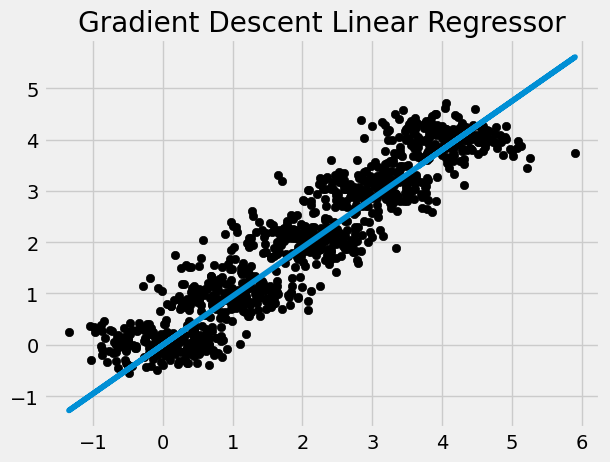

In [13]:
model = GradientDescentLinearRegression(
    initial_m=5,
    initial_b=0.01,
    learning_rate=0.001,
    iterations=1000)
model.fit(X, y)

plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")